In [47]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad


In [50]:
def integra_mc(fun, a, b, num_puntos=10000):

    #Defino las x
    x = [random.uniform(a, b) for _ in range(num_puntos)]

    #Vectorizas la funcion
    funVect = np.vectorize(fun)

    #Para cada valor de x buscas su "y" y almacenas el valor máximo
    max1 = max(funVect(x))

    #Defino y aleatorias para dibujar las cruces
    y = [random.uniform(0, max1) for _ in range(num_puntos)]
    
    #Numero cruces por debajo, comparo cada punto con el valor de la funcion
    puntos_debajo = np.sum(y <= funVect(x))
    
    #Calculo el área 
    area_rectangulo = (b - a) * max1
    integral_aproximada = (puntos_debajo / num_puntos) * area_rectangulo

    #Integral exacta usando scipy.integrate.quad
    def f(x):
        return funVect(x)
        
    integral_exacta, _ = quad(f, a, b)
    
    print(f"Integral exacta: {integral_exacta:.4f}")
    
     # Mostrar resultados
    print(f"Integral Monte Carlo: {integral_aproximada:.4f}")
    
    # Grafica
    figura, eje = plt.subplots()
    eje.set_xlabel("X")
    eje.set_ylabel("Y")
    eje.set_xlim(a, b)
    eje.set_ylim(0, max1 * 1.1)

    # Dibujar los puntos
    eje.scatter(x, y, marker='x', color='red', alpha=0.5)

    # Dibujar la función
    x_vals = [i / 100 for i in range(int(a * 100), int(b * 100) + 1)]
    y_vals = [fun(x) for x in x_vals]
    eje.plot(x_vals, y_vals, color='blue', label=f"y = {fun}")

    # Mostrar la gráfica
    plt.show()

Integral exacta: 343.3333
Integral Monte Carlo: 341.0405


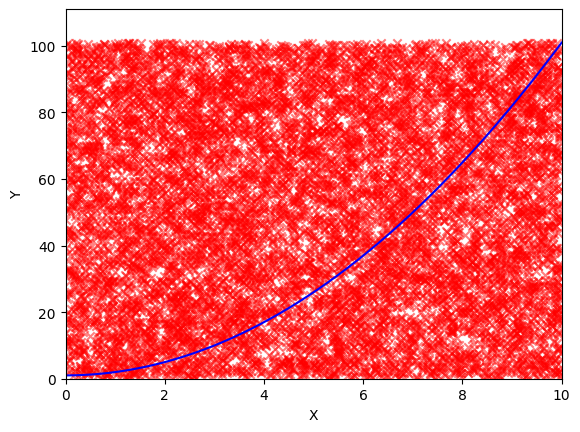

In [51]:
# Llamar a la función integra_mc

expr = (lambda x: x** 2+1) # funcion a integrar
a, b = 0, 10  # limites del intervalo
num_puntos = 10000  # puntos aleatorios

integra_mc(expr, a, b, num_puntos)